# Importing libraries and data

In [425]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle

In [426]:
df = pd.read_csv("data/credit1_train.csv")
df.shape

(614, 13)

1) What does our dataset looks like

In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [401]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [402]:
#looking for coherence in our dataset and finding outliers
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [403]:
df.describe(include='O') # Categorical columns

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002008,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


# Cleaning and completing Data

In [404]:
# We remove Load_ID from the table because it's not relevent in our study, since every client have a unique ID 
df=df.drop(["Loan_ID"],axis=1)

In [405]:
#We have some missing data, we ll complete them.
cat_data=[]
num_data=[]
for i,c in enumerate(df.dtypes):
  if c=="object":
    cat_data.append(df.iloc[:,i])
  else:
    num_data.append(df.iloc[:,i])
cat_data=pd.DataFrame(cat_data).transpose()
num_data=pd.DataFrame(num_data).transpose()
column_name_list = cat_data.columns.tolist()
column_name_list.remove('Loan_Status')

In [406]:
cat_data=cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isna().sum().any()

False

In [407]:
num_data.fillna(method="bfill",inplace=True)
num_data.isna().sum().any()

False

In [408]:
target_values={"Y":1,"N":0}
target=cat_data["Loan_Status"]
cat_data=cat_data.drop(["Loan_Status"],axis=1)

In [409]:
target=target.map(target_values)

In [410]:
# Replace categorical data with a numeric data
labelencorder=LabelEncoder()
for label in cat_data:
  cat_data[label]=labelencorder.fit_transform(cat_data[label])

In [411]:
cat_data

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,1,0,0,0,0,2
1,1,1,1,0,0,0
2,1,1,0,0,1,2
3,1,1,0,1,0,2
4,1,0,0,0,0,2
...,...,...,...,...,...,...
609,0,0,0,0,0,0
610,1,1,3,0,0,0
611,1,1,1,0,0,2
612,1,1,2,0,0,2


In [412]:
X=pd.concat([cat_data,num_data],axis=1)
y=target

In [413]:
X,y

(     Gender  Married  Dependents  ...  LoanAmount  Loan_Amount_Term  Credit_History
 0         1        0           0  ...       128.0             360.0             1.0
 1         1        1           1  ...       128.0             360.0             1.0
 2         1        1           0  ...        66.0             360.0             1.0
 3         1        1           0  ...       120.0             360.0             1.0
 4         1        0           0  ...       141.0             360.0             1.0
 ..      ...      ...         ...  ...         ...               ...             ...
 609       0        0           0  ...        71.0             360.0             1.0
 610       1        1           3  ...        40.0             180.0             1.0
 611       1        1           1  ...       253.0             360.0             1.0
 612       1        1           2  ...       187.0             360.0             1.0
 613       0        0           0  ...       133.0             36

In [414]:
df=pd.concat([X,y],axis=1)

# Some experiences and visualisation

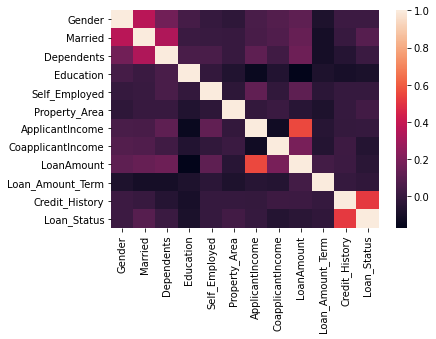

In [415]:
#we try to find if there is a correlation between some columns , for exemple we see that there is a big coorelation between 
#Credit history and Loan status , and a less strong one between applicant income and loan amount
sns.heatmap(df.corr());

In [416]:
#the Correlation between every column with the target
#it confirmes that the Credit history have a strong correlation with the Loan Status
df.drop("Loan_Status", axis=1).apply(lambda x: x.corr(df["Loan_Status"]))

Gender               0.017987
Married              0.091478
Dependents           0.010118
Education           -0.085884
Self_Employed       -0.003700
Property_Area        0.032112
ApplicantIncome     -0.004710
CoapplicantIncome   -0.059187
LoanAmount          -0.039871
Loan_Amount_Term    -0.022549
Credit_History       0.516944
dtype: float64

Percentage of granted credits:  0.6872964169381107
Percentage of denied credits:  0.3127035830618893


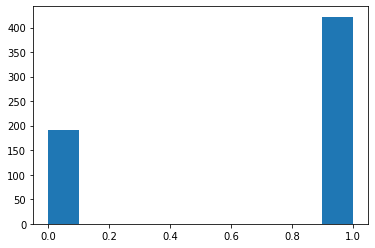

In [417]:
plt.hist(y)
granted=y.value_counts()[1]
total=y.count()
print("Percentage of granted credits: ",granted/total )
print("Percentage of denied credits: ",1-granted/total )

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


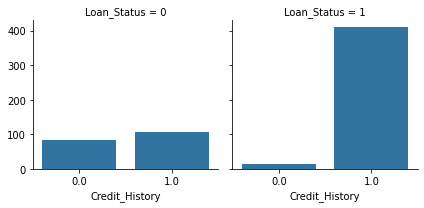

In [418]:
#Credit_history is 1 for clients that already have credit , 0 otherwise.
#comparing difference of Loan status whenever the client had a credit before
grid=sns.FacetGrid(df,col="Loan_Status")
grid.map(sns.countplot,"Credit_History")

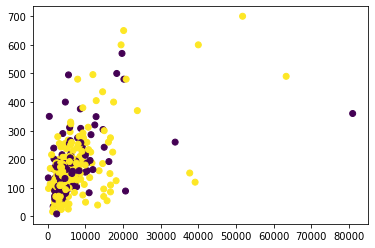

In [419]:
#we can observe that the higher income is , the higher  loan amout is granted.
#and the majority of declined Loans are for the less income clients
plt.scatter(df["ApplicantIncome"],df["LoanAmount"],c=y)

# Creating the model and training it

In [420]:
# We split our data into train and test  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [421]:
models={
   "KNeighborsClassifier" : KNeighborsClassifier(),
   "LogisticRegression" : LogisticRegression(),
   "DecisionTreeClassifier" : DecisionTreeClassifier(max_depth=3)
}

def my_accuracy(y_true,y_pred):
  accu=accuracy_score(y_true,y_pred)
  print('the accuracy of our model is :' ,accu)
  return accu

def train_test_eval(models,X_train,y_train,X_test,y_test):
  for name,model in models.items():
    print(name,":")
    model.fit(X_train,y_train)
    my_accuracy(y_test,model.predict(X_test))

In [422]:
train_test_eval(models,X_train,y_train,X_test,y_test)

KNeighborsClassifier :
the accuracy of our model is : 0.5665024630541872
LogisticRegression :
the accuracy of our model is : 0.7931034482758621
DecisionTreeClassifier :
the accuracy of our model is : 0.7881773399014779


In [423]:
#As we can see, Logistic Regression and Decision tree classifier have better accuracy
model=LogisticRegression();
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# exporting our model

In [428]:
pickle.dump(model,open('output/model.pkl','wb'))